In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

def calculate_momentum_properties(df):
    """
    计算动量大小和与z轴的夹角
    """
    # 提取动量分量
    px = df['px_521'].values
    py = df['py_521'].values
    pz = df['pz_521'].values
    
    # 计算动量大小
    p_magnitude = np.sqrt(px**2 + py**2 + pz**2)
    
    # 计算与z轴的夹角（弧度）
    # 使用点积公式: cos(theta) = (p·z)/(|p|*|z|) = pz/|p|
    cos_theta = pz / p_magnitude
    
    # 处理数值误差，确保cos_theta在[-1, 1]范围内
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    
    # 计算角度（弧度）
    theta_rad = np.arccos(cos_theta)
    
    # 转换为角度
    theta_deg = np.degrees(theta_rad)
    
    return p_magnitude, theta_deg, theta_rad

def plot_momentum_distribution_2d(df, output_path=None, bins=100):
    """
    绘制动量分布二维图
    
    参数:
    df: 包含动量数据的DataFrame
    output_path: 输出图像路径（可选）
    bins: 直方图分箱数
    """
    # 计算动量大小和角度
    p_magnitude, theta_deg, theta_rad = calculate_momentum_properties(df)
    
    # 创建图形
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. 二维直方图（颜色表示数量）
    ax1 = axes[0, 0]
    h = ax1.hist2d(theta_deg, p_magnitude, bins=bins, cmap='viridis', norm=LogNorm())
    ax1.set_xlabel('Angle with Z-axis (degrees)', fontsize=12)
    ax1.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax1.set_title('2D Momentum Distribution (Log Scale)', fontsize=14)
    plt.colorbar(h[3], ax=ax1, label='Counts')
    
    # 2. 二维散点图（带颜色映射）
    ax2 = axes[0, 1]
    sc = ax2.scatter(theta_deg, p_magnitude, c=p_magnitude, 
                     s=1, alpha=0.5, cmap='plasma')
    ax2.set_xlabel('Angle with Z-axis (degrees)', fontsize=12)
    ax2.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax2.set_title('Momentum Scatter Plot', fontsize=14)
    plt.colorbar(sc, ax=ax2, label='Momentum (GeV/c)')
    
    # 3. 密度图
    ax3 = axes[1, 0]
    h2 = ax3.hist2d(theta_deg, p_magnitude, bins=bins, cmap='hot', norm=LogNorm())
    ax3.set_xlabel('Angle with Z-axis (degrees)', fontsize=12)
    ax3.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax3.set_title('Density Plot (Log Scale)', fontsize=14)
    plt.colorbar(h2[3], ax=ax3, label='Counts')
    
    # 4. 极坐标投影的二维直方图
    ax4 = axes[1, 1]
    # 将角度转换为弧度用于极坐标
    h3 = ax4.hist2d(theta_rad, p_magnitude, bins=bins, cmap='coolwarm', norm=LogNorm())
    ax4.set_xlabel('Angle with Z-axis (radians)', fontsize=12)
    ax4.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax4.set_title('Distribution in Radians', fontsize=14)
    plt.colorbar(h3[3], ax=ax4, label='Counts')
    
    plt.tight_layout()
    
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"图像已保存至: {output_path}")
    
    plt.show()
    
    return fig

def plot_enhanced_2d_distribution(df, output_path=None, bins=150):
    """
    绘制增强版的二维分布图（单个大图）
    """
    # 计算动量大小和角度
    p_magnitude, theta_deg, theta_rad = calculate_momentum_properties(df)
    
    # 创建图形
    fig = plt.figure(figsize=(16, 12))
    
    # 1. 主图：二维直方图（对数颜色尺度）
    ax1 = plt.subplot(221)
    h1 = ax1.hist2d(theta_deg, p_magnitude, bins=bins, cmap='viridis', norm=LogNorm())
    ax1.set_xlabel('Angle with Z-axis (degrees)', fontsize=12)
    ax1.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax1.set_title('Momentum Distribution (Log Color Scale)', fontsize=14)
    plt.colorbar(h1[3], ax=ax1, label='Counts (log scale)')
    
    # 添加统计信息
    stats_text = f'Total events: {len(df):,}\n'
    stats_text += f'Mean momentum: {np.mean(p_magnitude):.3f} GeV/c\n'
    stats_text += f'Mean angle: {np.mean(theta_deg):.1f}°'
    ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 2. 边缘分布：角度分布
    ax2 = plt.subplot(222)
    ax2.hist(theta_deg, bins=bins//2, alpha=0.7, color='blue', edgecolor='black')
    ax2.set_xlabel('Angle with Z-axis (degrees)', fontsize=12)
    ax2.set_ylabel('Counts', fontsize=12)
    ax2.set_title('Angular Distribution', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    # 3. 边缘分布：动量大小分布
    ax3 = plt.subplot(223)
    ax3.hist(p_magnitude, bins=bins//2, alpha=0.7, color='red', edgecolor='black')
    ax3.set_xlabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax3.set_ylabel('Counts', fontsize=12)
    ax3.set_title('Momentum Magnitude Distribution', fontsize=14)
    ax3.grid(True, alpha=0.3)
    
    # 4. 相关性热图（使用hexbin）
    ax4 = plt.subplot(224)
    hb = ax4.hexbin(theta_rad, p_magnitude, gridsize=50, cmap='YlOrRd', mincnt=1)
    ax4.set_xlabel('Angle with Z-axis (rad)', fontsize=12)
    ax4.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax4.set_yscale('log')
    ax4.set_title('Hexbin Distribution', fontsize=14)
    plt.colorbar(hb, ax=ax4, label='Counts')
    
    plt.suptitle(f'B_521 Momentum Analysis (Total events: {len(df):,})', fontsize=16, y=1.02)
    plt.tight_layout()
    
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"增强版图像已保存至: {output_path}")
    
    plt.show()
    
    return fig

def analyze_momentum_data(file_path, plot_type='enhanced'):
    """
    分析动量数据的主函数
    
    参数:
    file_path: B_521.csv文件路径
    plot_type: 绘图类型 ('basic' 或 'enhanced')
    """
    # 读取数据
    print(f"正在读取文件: {file_path}")
    df = pd.read_csv(file_path)
    print(f"数据读取成功，共 {len(df)} 行")
    
    # 检查必要的列是否存在
    required_columns = ['px_521', 'py_521', 'pz_521']
    missing_columns = [col for col in required_columns if col not in df.columns]
    
    if missing_columns:
        raise ValueError(f"缺少必要的列: {missing_columns}")
    
    # 计算统计信息
    p_magnitude, theta_deg, theta_rad = calculate_momentum_properties(df)
    
    print("\n=== 统计信息 ===")
    print(f"总事件数: {len(df):,}")
    print(f"动量大小范围: [{np.min(p_magnitude):.3f}, {np.max(p_magnitude):.3f}] GeV/c")
    print(f"动量大小均值: {np.mean(p_magnitude):.3f} ± {np.std(p_magnitude):.3f} GeV/c")
    print(f"角度范围: [{np.min(theta_deg):.1f}, {np.max(theta_deg):.1f}] 度")
    print(f"角度均值: {np.mean(theta_deg):.1f} ± {np.std(theta_deg):.1f} 度")
    print(f"前向粒子 (θ < 90°): {np.sum(theta_deg < 90):,} ({np.sum(theta_deg < 90)/len(df)*100:.1f}%)")
    print(f"后向粒子 (θ > 90°): {np.sum(theta_deg > 90):,} ({np.sum(theta_deg > 90)/len(df)*100:.1f}%)")
    
    # 绘制图像
    if plot_type == 'basic':
        fig = plot_momentum_distribution_2d(df, bins=100)
    elif plot_type == 'enhanced':
        fig = plot_enhanced_2d_distribution(df, bins=150)
    elif plot_type == 'no':
        fig = None
    else:
        raise ValueError(f"未知的绘图类型: {plot_type}")
    
    return df, p_magnitude, theta_deg, fig, theta_rad

# 主程序
# if __name__ == "__main__":
#     # 设置文件路径
#     file_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Decay_B2025-12-03_2HDM_B_test/B_521.csv"  # 请替换为实际路径
    
#     # 设置输出图像路径（可选）
#     output_image_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_521_momentum_distribution.png"  # 可选
    
#     try:
#         # 分析数据并绘制图像
#         df, p_magnitude, theta_deg, fig, theta_rad = analyze_momentum_data(file_path, plot_type='no')
        
#         # 如果需要保存单个二维图
#         if output_image_path:
#             # 创建一个专门的二维图
#             plt.figure(figsize=(10, 8))
#             h = plt.hist2d(theta_rad, p_magnitude, bins=3000, cmap='viridis', norm=LogNorm())
#             plt.xlabel('Angle with Z-axis (rad)', fontsize=12)
#             plt.ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
#             plt.yscale('log')
#             plt.xscale('log')
#             plt.title(f'B_521 Momentum Distribution\n(Total events: {len(df):,})', fontsize=14)
#             plt.colorbar(h[3], label='Counts (log scale)')
#             plt.grid(True, alpha=0.3)
#             plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
#             print(f"\n二维图像已保存至: {output_image_path}")
#             plt.show()
        
#     except FileNotFoundError:
#         print(f"错误: 找不到文件 {file_path}")
#     except Exception as e:
#         print(f"错误: {e}")
#         import traceback
#         traceback.print_exc()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

def calculate_momentum_properties(df):
    """
    计算动量大小和与z轴的夹角
    """
    # 提取动量分量
    px = df['px_521'].values
    py = df['py_521'].values
    pz = df['pz_521'].values
    
    # 计算动量大小
    p_magnitude = np.sqrt(px**2 + py**2 + pz**2)
    
    # 计算与z轴的夹角（弧度）
    # 使用点积公式: cos(theta) = (p·z)/(|p|*|z|) = pz/|p|
    cos_theta = pz / p_magnitude
    
    # 处理数值误差，确保cos_theta在[-1, 1]范围内
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    
    # 计算角度（弧度）
    theta_rad = np.arccos(cos_theta)
    
    # 避免0角度（log坐标需要正值）
    theta_rad = np.maximum(theta_rad, 1e-10)
    
    return p_magnitude, theta_rad

def create_log_bins(data_min, data_max, n_bins, log_offset=1e-10):
    """
    创建对数分箱
    
    参数:
    data_min: 数据最小值
    data_max: 数据最大值
    n_bins: 分箱数量
    log_offset: 对数偏移（避免log(0)）
    
    返回:
    bins: 对数分箱边界
    """
    # 确保最小值大于0（对数需要正值）
    data_min_log = np.log10(max(data_min, log_offset))
    data_max_log = np.log10(data_max)
    
    # 在对数空间创建等间距分箱
    log_bins = np.logspace(data_min_log, data_max_log, n_bins + 1)
    
    return log_bins

def plot_log_log_hist2d(theta_rad, p_magnitude, output_path=None, n_bins_x=100, n_bins_y=100):
    """
    绘制对数-对数坐标的2D直方图，使用对数分箱
    """
    # 过滤无效数据（确保为正数）
    valid_idx = (theta_rad > 0) & (p_magnitude > 0)
    theta_rad_valid = theta_rad[valid_idx]
    p_magnitude_valid = p_magnitude[valid_idx]
    
    # 创建对数分箱
    # X轴（角度）：对数分箱
    x_min, x_max = theta_rad_valid.min(), theta_rad_valid.max()
    x_bins = create_log_bins(x_min, x_max, n_bins_x)
    
    # Y轴（动量）：对数分箱
    y_min, y_max = p_magnitude_valid.min(), p_magnitude_valid.max()
    y_bins = create_log_bins(y_min, y_max, n_bins_y)
    
    # 创建图形
    plt.figure(figsize=(12, 9))
    
    # 绘制2D直方图，使用对数分箱
    h = plt.hist2d(theta_rad_valid, p_magnitude_valid, 
                   bins=[x_bins, y_bins], 
                   cmap='viridis', 
                   norm=LogNorm())
    
    # 设置坐标轴
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Angle with Z-axis (rad)', fontsize=14)
    plt.ylabel('Momentum Magnitude (GeV/c)', fontsize=14)
    plt.title(f'B_521 Momentum Distribution (Log-Log Scale)\nTotal events: {len(theta_rad_valid):,}', fontsize=16)
    
    # 颜色条
    cbar = plt.colorbar(h[3])
    cbar.set_label('Counts per log-log bin', fontsize=12)
    
    # 添加网格
    plt.grid(True, which='both', alpha=0.3, linestyle='--')
    
    # 添加统计信息文本框
    stats_text = (f'Events: {len(theta_rad_valid):,}\n'
                  f'θ range: [{x_min:.2e}, {x_max:.2f}] rad\n'
                  f'p range: [{y_min:.2e}, {y_max:.2f}] GeV/c\n'
                  f'Bins: {n_bins_x}×{n_bins_y} (log spacing)')
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"图像已保存至: {output_path}")
    
    plt.show()
    
    return h

def plot_adaptive_log_hist2d(theta_rad, p_magnitude, output_path=None):
    """
    自适应对数分箱的2D直方图
    """
    # 过滤数据
    valid_idx = (theta_rad > 0) & (p_magnitude > 0)
    theta_rad_valid = theta_rad[valid_idx]
    p_magnitude_valid = p_magnitude[valid_idx]
    
    # 根据数据范围自动确定分箱数量
    n_bins_x = min(200, int(50 * np.log10(theta_rad_valid.max() / max(theta_rad_valid.min(), 1e-10))))
    n_bins_y = min(200, int(50 * np.log10(p_magnitude_valid.max() / p_magnitude_valid.min())))
    
    n_bins_x = max(50, n_bins_x)
    n_bins_y = max(50, n_bins_y)
    
    print(f"使用自适应分箱: {n_bins_x}×{n_bins_y}")
    
    return plot_log_log_hist2d(theta_rad, p_magnitude, output_path, n_bins_x, n_bins_y)

def plot_density_log_log(theta_rad, p_magnitude, output_path=None):
    """
    使用hexbin绘制对数-对数坐标的密度图（更适合稀疏数据）
    """
    # 过滤数据
    valid_idx = (theta_rad > 0) & (p_magnitude > 0)
    theta_rad_valid = theta_rad[valid_idx]
    p_magnitude_valid = p_magnitude[valid_idx]
    
    plt.figure(figsize=(12, 9))
    
    # 使用hexbin（六边形分箱），适合对数坐标
    hb = plt.hexbin(theta_rad_valid, p_magnitude_valid,
                    xscale='log', yscale='log',
                    gridsize=100,  # 六边形网格大小
                    mincnt=1,      # 最小计数
                    cmap='viridis',
                    bins='log')    # 对数颜色尺度
    
    plt.xlabel('Angle with Z-axis (rad)', fontsize=14)
    plt.ylabel('Momentum Magnitude (GeV/c)', fontsize=14)
    plt.title(f'B_521 Momentum Distribution (Hexbin Log-Log)\nTotal events: {len(theta_rad_valid):,}', fontsize=16)
    
    cbar = plt.colorbar(hb)
    cbar.set_label('Counts per hexbin', fontsize=12)
    
    plt.grid(True, which='both', alpha=0.3, linestyle='--')
    
    if output_path:
        plt.savefig(output_path.replace('.png', '_hexbin.png'), dpi=300, bbox_inches='tight')
        print(f"Hexbin图像已保存至: {output_path.replace('.png', '_hexbin.png')}")
    
    plt.show()

def plot_comparison(theta_rad, p_magnitude, output_path=None):
    """
    绘制对比图：线性分箱 vs 对数分箱
    """
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # 1. 原始方法（线性分箱，对数坐标）
    ax1 = axes[0]
    h1 = ax1.hist2d(theta_rad, p_magnitude, bins=3000, cmap='viridis', norm=LogNorm())
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('Angle with Z-axis (rad)', fontsize=12)
    ax1.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax1.set_title('Linear Binning (shows distortion)', fontsize=14)
    ax1.grid(True, alpha=0.3)
    plt.colorbar(h1[3], ax=ax1, label='Counts')
    
    # 2. 改进方法（对数分箱）
    ax2 = axes[1]
    
    # 过滤数据
    valid_idx = (theta_rad > 0) & (p_magnitude > 0)
    theta_rad_valid = theta_rad[valid_idx]
    p_magnitude_valid = p_magnitude[valid_idx]
    
    # 创建对数分箱
    x_bins = np.logspace(np.log10(theta_rad_valid.min()), 
                         np.log10(theta_rad_valid.max()), 200)
    y_bins = np.logspace(np.log10(p_magnitude_valid.min()), 
                         np.log10(p_magnitude_valid.max()), 200)
    
    h2 = ax2.hist2d(theta_rad_valid, p_magnitude_valid, 
                    bins=[x_bins, y_bins], 
                    cmap='viridis', norm=LogNorm())
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlabel('Angle with Z-axis (rad)', fontsize=12)
    ax2.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax2.set_title('Logarithmic Binning (correct distribution)', fontsize=14)
    ax2.grid(True, alpha=0.3)
    plt.colorbar(h2[3], ax=ax2, label='Counts')
    
    plt.suptitle(f'B_521 Momentum Distribution Comparison\nTotal events: {len(theta_rad):,}', fontsize=16)
    plt.tight_layout()
    
    if output_path:
        plt.savefig(output_path.replace('.png', '_comparison.png'), dpi=300, bbox_inches='tight')
        print(f"对比图像已保存至: {output_path.replace('.png', '_comparison.png')}")
    
    plt.show()

def main():
    """
    主函数
    """
    # 设置文件路径
    file_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Decay_B2025-12-03_2HDM_B_test/B_521.csv"  # 请替换为实际路径

    # 设置输出图像路径（可选）
    output_image_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_521_momentum_distribution.png"  # 可选
    
    try:
        # 读取数据
        print(f"正在读取文件: {file_path}")
        df = pd.read_csv(file_path)
        print(f"数据读取成功，共 {len(df)} 行")
        
        # 检查必要的列
        required_columns = ['px_521', 'py_521', 'pz_521']
        missing_columns = [col for col in required_columns if col not in df.columns]
        
        if missing_columns:
            raise ValueError(f"缺少必要的列: {missing_columns}")
        
        # 计算动量属性
        p_magnitude, theta_rad = calculate_momentum_properties(df)
        
        print("\n=== 数据统计 ===")
        print(f"总事件数: {len(df):,}")
        print(f"有效事件数(θ>0, p>0): {np.sum((theta_rad > 0) & (p_magnitude > 0)):,}")
        print(f"角度范围: [{theta_rad.min():.2e}, {theta_rad.max():.2f}] rad")
        print(f"动量范围: [{p_magnitude.min():.2e}, {p_magnitude.max():.2f}] GeV/c")
        
        # 绘制不同类型的图像
        print("\n=== 绘制图像 ===")
        
        # 1. 对数分箱的2D直方图（推荐）
        print("绘制对数分箱2D直方图...")
        plot_log_log_hist2d(theta_rad, p_magnitude, output_image_path, n_bins_x=150, n_bins_y=150)
        
        # 2. 自适应分箱
        print("\n绘制自适应分箱图像...")
        plot_adaptive_log_hist2d(theta_rad, p_magnitude, 
                                output_image_path.replace('.png', '_adaptive.png'))
        
        # 3. Hexbin密度图（适合稀疏数据）
        print("\n绘制Hexbin密度图...")
        plot_density_log_log(theta_rad, p_magnitude, output_image_path)
        
        # # 4. 对比图
        # print("\n绘制对比图...")
        # plot_comparison(theta_rad, p_magnitude, output_image_path)
        
        print("\n所有图像绘制完成!")
        
    except Exception as e:
        print(f"错误: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

=== 步骤1: 读取原始数据 ===
原始数据读取成功，共 1733661 行

=== 步骤2: 计算动量属性 ===

=== 步骤3: 计算分箱数据 ===
有效数据点: 1,733,661
角度范围: [8.492e-06, 3.142] rad
动量范围: [8.609e-02, 5541.384] GeV/c

创建二维表格格式数据...
分箱数据已保存至: /media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_binsbinned_momentum_data_pt.csv
保存了 3860 个非空分箱
矩阵格式数据已保存至: /media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_binsbinned_momentum_data_pt_matrix.csv
边缘分布数据已保存至: /media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_binsbinned_momentum_data_pt_marginal.csv
原始数据分箱结果已保存至: /media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_binsbinned_momentum_data_pt_raw_binned.csv

=== 步骤4: 分箱数据统计 ===
非空分箱数量: 3860
总计数: 1,733,660.0
平均每个分箱计数: 449.1
最大分箱计数: 19,976.0
最小非零分箱计数: 1.0

=

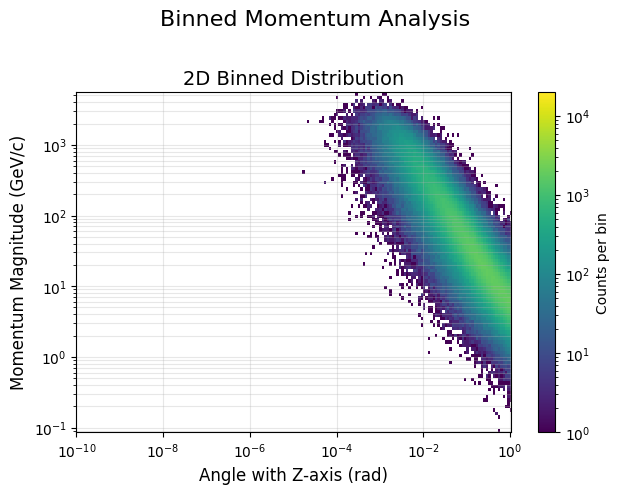


=== 步骤6: 保存汇总统计 ===
汇总统计已保存至: /media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_binsbinned_momentum_data_pt_summary.csv

=== 处理完成 ===
所有文件已保存到: /media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def calculate_momentum_properties(df):
    """
    计算动量大小和与z轴的夹角
    """
    # 提取动量分量
    px = df['px_521'].values
    py = df['py_521'].values
    pz = df['pz_521'].values
    
    # 计算动量大小
    p_magnitude = np.sqrt(px**2 + py**2 + pz**2)
    
    # 计算与z轴的夹角（弧度）
    cos_theta = pz / p_magnitude
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    theta_rad = np.arccos(cos_theta)
    theta_rad = np.maximum(theta_rad, 1e-10)
    
    return p_magnitude, theta_rad

def create_log_bins(data_min, data_max, n_bins, log_offset=1e-10):
    """
    创建对数分箱
    """
    data_min_log = np.log10(max(data_min, log_offset))
    data_max_log = np.log10(data_max)
    log_bins = np.logspace(data_min_log, data_max_log, n_bins + 1)
    return log_bins

def calculate_binned_data_and_save(theta_rad, p_magnitude, output_csv_path, 
                                  n_bins_x=100, n_bins_y=100, save_raw_data=False):
    """
    计算分箱数据并保存为CSV文件
    
    参数:
    theta_rad: 角度数据（弧度）
    p_magnitude: 动量大小数据
    output_csv_path: 输出CSV文件路径
    n_bins_x, n_bins_y: 分箱数量
    save_raw_data: 是否同时保存原始数据的分箱结果
    """
    # 过滤无效数据
    valid_idx = (theta_rad > 0) & (p_magnitude > 0)
    theta_rad_valid = theta_rad[valid_idx]
    p_magnitude_valid = p_magnitude[valid_idx]
    
    print(f"有效数据点: {len(theta_rad_valid):,}")
    print(f"角度范围: [{theta_rad_valid.min():.3e}, {theta_rad_valid.max():.3f}] rad")
    print(f"动量范围: [{p_magnitude_valid.min():.3e}, {p_magnitude_valid.max():.3f}] GeV/c")
    
    # 创建对数分箱
    x_bins = create_log_bins(theta_rad_valid.min(), theta_rad_valid.max(), n_bins_x)
    y_bins = create_log_bins(p_magnitude_valid.min(), p_magnitude_valid.max(), n_bins_y)
    
    # 计算2D直方图
    hist, x_edges, y_edges = np.histogram2d(theta_rad_valid, p_magnitude_valid, 
                                           bins=[x_bins, y_bins])
    
    # 创建分箱中心坐标
    x_centers = (x_edges[:-1] + x_edges[1:]) / 2
    y_centers = (y_edges[:-1] + y_edges[1:]) / 2
    
    # 创建分箱宽度
    x_widths = np.diff(x_edges)
    y_widths = np.diff(y_edges)
    
    # 方法1: 保存为二维表格格式（每个分箱一行）
    print("\n创建二维表格格式数据...")
    binned_data = []
    
    for i in range(len(x_centers)):
        for j in range(len(y_centers)):
            if hist[i, j] > 0:  # 只保存有数据的箱
                binned_data.append({
                    'theta_center_rad': x_centers[i],
                    # 'theta_min_rad': x_edges[i],
                    # 'theta_max_rad': x_edges[i+1],
                    'theta_width_rad': x_widths[i],
                    'p_center_GeV': y_centers[j],
                    # 'p_min_GeV': y_edges[j],
                    # 'p_max_GeV': y_edges[j+1],
                    'p_width_GeV': y_widths[j],
                    'count': hist[i, j],
                    'log_theta_center': np.log10(x_centers[i]),
                    'log_p_center': np.log10(y_centers[j]),
                    'density': hist[i, j] / (x_widths[i] * y_widths[j]),  # 面密度
                    'log_density': np.log10(max(hist[i, j] / (x_widths[i] * y_widths[j]), 1e-10))
                })
    
    # 转换为DataFrame
    df_binned = pd.DataFrame(binned_data)
    
    # 保存到CSV
    df_binned.to_csv(output_csv_path, index=False)
    print(f"分箱数据已保存至: {output_csv_path}")
    print(f"保存了 {len(df_binned)} 个非空分箱")
    
    # 方法2: 保存为矩阵格式（可选）
    matrix_csv_path = output_csv_path.replace('.csv', '_matrix.csv')
    matrix_df = pd.DataFrame(hist.T,  # 转置使得行对应p，列对应theta
                           index=y_centers,
                           columns=x_centers)
    matrix_df.index.name = 'p_center_GeV'
    matrix_df.columns.name = 'theta_center_rad'
    matrix_df.to_csv(matrix_csv_path)
    print(f"矩阵格式数据已保存至: {matrix_csv_path}")
    
    # 方法3: 保存边缘分布（可选）
    marginal_csv_path = output_csv_path.replace('.csv', '_marginal.csv')
    
    # x方向边缘分布（角度分布）
    x_marginal = hist.sum(axis=1)
    # y方向边缘分布（动量分布）
    y_marginal = hist.sum(axis=0)
    
    df_marginal = pd.DataFrame({
        'theta_center_rad': x_centers,
        # 'theta_min_rad': x_edges[:-1],
        # 'theta_max_rad': x_edges[1:],
        'theta_count': x_marginal,
        'theta_density': x_marginal / x_widths,
        'p_center_GeV': y_centers,
        # 'p_min_GeV': y_edges[:-1],
        # 'p_max_GeV': y_edges[1:],
        'p_count': y_marginal,
        'p_density': y_marginal / y_widths
    })
    
    df_marginal.to_csv(marginal_csv_path, index=False)
    print(f"边缘分布数据已保存至: {marginal_csv_path}")
    
    # 如果需要保存原始数据的分箱结果
    if save_raw_data:
        raw_binned_csv_path = output_csv_path.replace('.csv', '_raw_binned.csv')
        
        # 为每个原始数据点分配所属的分箱
        x_indices = np.digitize(theta_rad_valid, x_edges) - 1
        y_indices = np.digitize(p_magnitude_valid, y_edges) - 1
        
        # 确保索引在有效范围内
        x_indices = np.clip(x_indices, 0, len(x_centers)-1)
        y_indices = np.clip(y_indices, 0, len(y_centers)-1)
        
        df_raw_binned = pd.DataFrame({
            'theta_rad': theta_rad_valid,
            'p_GeV': p_magnitude_valid,
            # 'theta_bin_index': x_indices,
            # 'p_bin_index': y_indices,
            'theta_bin_center': x_centers[x_indices],
            'p_bin_center': y_centers[y_indices],
            # 'theta_bin_min': x_edges[x_indices],
            # 'theta_bin_max': x_edges[x_indices + 1],
            # 'p_bin_min': y_edges[y_indices],
            # 'p_bin_max': y_edges[y_indices + 1]
        })
        
        df_raw_binned.to_csv(raw_binned_csv_path, index=False)
        print(f"原始数据分箱结果已保存至: {raw_binned_csv_path}")
    
    # 返回分箱数据供可视化使用
    return {
        'hist': hist,
        'x_edges': x_edges,
        'y_edges': y_edges,
        'x_centers': x_centers,
        'y_centers': y_centers,
        'df_binned': df_binned,
        'df_matrix': matrix_df,
        'df_marginal': df_marginal
    }

def plot_and_save_binned_data(binned_data, output_image_path=None):
    """
    绘制分箱数据并保存图像
    """
    hist = binned_data['hist']
    x_centers = binned_data['x_centers']
    y_centers = binned_data['y_centers']
    x_edges = binned_data['x_edges']
    y_edges = binned_data['y_edges']
    
    # 创建图形
    fig = plt.plot(figsize=(30, 24))
    
    # 1. 主图：2D直方图（对数坐标）
    # ax1 = axes[0]
    im1 = plt.pcolormesh(x_edges, y_edges, hist.T,  # 转置以适应pcolormesh
                        cmap='viridis', norm=LogNorm())
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Angle with Z-axis (rad)', fontsize=12)
    plt.ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    plt.xlim(1e-10, 1.07)
    plt.title('2D Binned Distribution', fontsize=14)
    plt.colorbar(im1, label='Counts per bin')
    plt.grid(True, alpha=0.3, which='both')
    
    plt.suptitle('Binned Momentum Analysis', fontsize=16, y=1.02)
    plt.tight_layout()
    
    if output_image_path:
        plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
        print(f"可视化图像已保存至: {output_image_path}")
    
    plt.show()
    
    return fig

def main():
    """
    主函数
    """
    # 设置文件路径路径
    output_csv_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_binsbinned_momentum_data_pt.csv"
    
    input_file_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Decay_B2025-12-03_2HDM_B_test/B_521.csv"  # 请替换为实际路径

    # 设置输出图像路径（可选）
    output_image_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_521_momentum_distribution_Pt.png"  # 可选

    try:
        # 1. 读取原始数据
        print("=== 步骤1: 读取原始数据 ===")
        df = pd.read_csv(input_file_path)
        print(f"原始数据读取成功，共 {len(df)} 行")
        
        # 2. 计算动量属性
        print("\n=== 步骤2: 计算动量属性 ===")
        p_magnitude, theta_rad = calculate_momentum_properties(df)
        
        # 3. 计算分箱数据并保存
        print("\n=== 步骤3: 计算分箱数据 ===")
        binned_data = calculate_binned_data_and_save(
            theta_rad, p_magnitude, 
            output_csv_path=output_csv_path,
            n_bins_x=100,  # 角度分箱数
            n_bins_y=100,  # 动量分箱数
            save_raw_data=True  # 同时保存原始数据的分箱结果
        )
        
        # 4. 显示分箱数据统计
        print("\n=== 步骤4: 分箱数据统计 ===")
        df_binned = binned_data['df_binned']
        print(f"非空分箱数量: {len(df_binned)}")
        print(f"总计数: {df_binned['count'].sum():,}")
        print(f"平均每个分箱计数: {df_binned['count'].mean():.1f}")
        print(f"最大分箱计数: {df_binned['count'].max():,}")
        print(f"最小非零分箱计数: {df_binned['count'].min():,}")
        
        # 5. 绘制可视化
        print("\n=== 步骤5: 绘制可视化图像 ===")
        plot_and_save_binned_data(binned_data, output_image_path)
        
        # 6. 保存汇总统计
        print("\n=== 步骤6: 保存汇总统计 ===")
        summary_csv_path = output_csv_path.replace('.csv', '_summary.csv')
        summary_stats = {
            'total_events': len(df),
            'valid_events': len(theta_rad[(theta_rad > 0) & (p_magnitude > 0)]),
            'theta_min_rad': theta_rad.min(),
            'theta_max_rad': theta_rad.max(),
            'p_min_GeV': p_magnitude.min(),
            'p_max_GeV': p_magnitude.max(),
            'n_bins_theta': 150,
            'n_bins_p': 150,
            'n_nonempty_bins': len(df_binned),
            'total_counts_in_bins': df_binned['count'].sum(),
            'mean_counts_per_bin': df_binned['count'].mean(),
            'max_counts_per_bin': df_binned['count'].max(),
            'min_counts_per_bin': df_binned['count'].min(),
            'output_files': [
                output_csv_path,
                output_csv_path.replace('.csv', '_matrix.csv'),
                output_csv_path.replace('.csv', '_marginal.csv'),
                output_csv_path.replace('.csv', '_raw_binned.csv'),
                output_image_path
            ]
        }
        
        summary_df = pd.DataFrame([summary_stats])
        summary_df.to_csv(summary_csv_path, index=False)
        print(f"汇总统计已保存至: {summary_csv_path}")
        
        print("\n=== 处理完成 ===")
        print(f"所有文件已保存到: {os.path.dirname(output_csv_path)}")
        
    except Exception as e:
        print(f"错误: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    import os
    main()

=== 步骤1: 读取原始数据 ===
原始数据读取成功，共 1733661 行

=== 步骤2: 计算动量属性 ===

=== 步骤3: 计算分箱数据 ===
有效数据点: 1,733,661
角度范围: [8.492e-06, 3.142] rad
动量范围: [8.609e-02, 5541.384] GeV/c

创建二维表格格式数据...
分箱数据已保存至: /media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_binsbinned_momentum_data_pt.csv
保存了 3860 个非空分箱
矩阵格式数据已保存至: /media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_binsbinned_momentum_data_pt_matrix.csv
边缘分布数据已保存至: /media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_binsbinned_momentum_data_pt_marginal.csv
原始数据分箱结果已保存至: /media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_binsbinned_momentum_data_pt_raw_binned.csv

=== 步骤4: 分箱数据统计 ===
非空分箱数量: 3860

=== 步骤5: 绘制可视化图像（带能量筛选）===
添加能量筛选轮廓线: 5.27 ≤ E ≤ 5.3 GeV
筛选数据点: 1

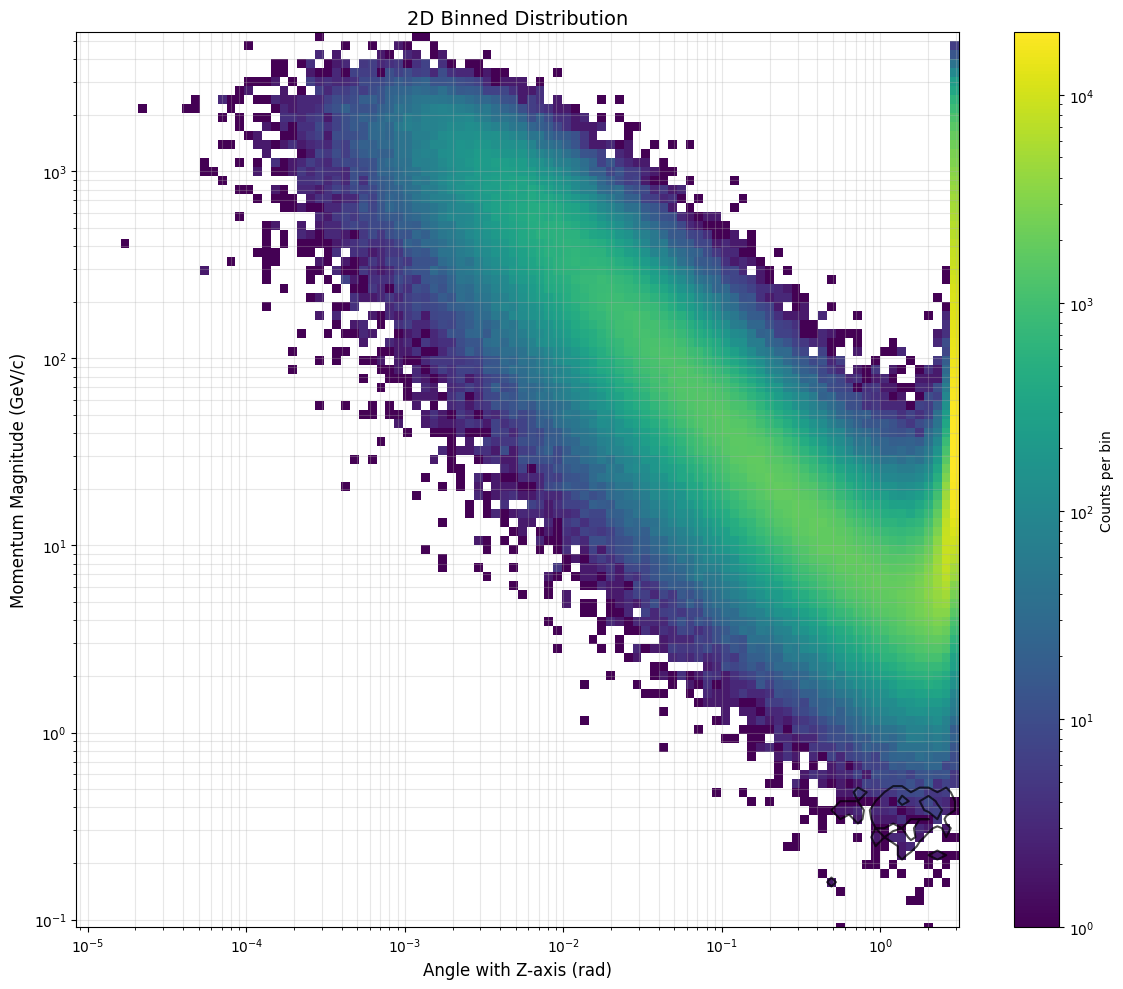


=== 处理完成 ===


In [5]:
def plot_and_save_binned_data_energy(binned_data, df, output_image_path=None,
                                    energy_min=None, energy_max=None, energy_column='E_521'):
    """
    简化版本：在原有图上叠加能量筛选数据的黑线轮廓
    """
    hist = binned_data['hist']
    x_centers = binned_data['x_centers']
    y_centers = binned_data['y_centers']
    x_edges = binned_data['x_edges']
    y_edges = binned_data['y_edges']
    
    # 创建图形
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # 绘制2D直方图（对数坐标）
    im = ax.pcolormesh(x_edges, y_edges, hist.T,
                      cmap='viridis', norm=LogNorm())
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Angle with Z-axis (rad)', fontsize=12)
    ax.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax.set_xlim(x_edges[0], x_edges[-1])
    ax.set_title('2D Binned Distribution', fontsize=14)
    
    # 添加颜色条
    plt.colorbar(im, ax=ax, label='Counts per bin')
    
    # 如果指定了能量范围，添加筛选数据的轮廓线
    if energy_min is not None and energy_max is not None and energy_column in df.columns:
        # 筛选能量范围内的数据
        energy_mask = (df[energy_column] >= energy_min) & (df[energy_column] <= energy_max)
        
        if np.sum(energy_mask) > 0:
            print(f"添加能量筛选轮廓线: {energy_min} ≤ E ≤ {energy_max} GeV")
            print(f"筛选数据点: {np.sum(energy_mask):,}")
            
            # 计算筛选后的动量属性
            px_filtered = df.loc[energy_mask, 'px_521'].values
            py_filtered = df.loc[energy_mask, 'py_521'].values
            pz_filtered = df.loc[energy_mask, 'pz_521'].values
            
            # 计算筛选后的动量大小和角度
            p_magnitude_filtered = np.sqrt(px_filtered**2 + py_filtered**2 + pz_filtered**2)
            cos_theta_filtered = pz_filtered / p_magnitude_filtered
            cos_theta_filtered = np.clip(cos_theta_filtered, -1.0, 1.0)
            theta_rad_filtered = np.arccos(cos_theta_filtered)
            
            # 创建筛选数据的2D直方图
            hist_filtered, _, _ = np.histogram2d(
                theta_rad_filtered, p_magnitude_filtered, 
                bins=[x_edges, y_edges]
            )
            
            # 创建网格
            X, Y = np.meshgrid(x_centers, y_centers)
            
            # 绘制简单的黑线轮廓（只画最高几层）
            contour_levels = sorted([1, 5, 10, 50, 100])  # 只画较低的计数层
            
            # 绘制轮廓线（黑线）
            ax.contour(X.T, Y.T, hist_filtered, 
                      levels=contour_levels,
                      colors='black',
                      linewidths=1.5,
                      alpha=0.7)
    
    ax.grid(True, alpha=0.3, which='both')
    plt.tight_layout()
    
    if output_image_path:
        plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
        print(f"图像已保存: {output_image_path}")
    
    plt.show()
    
    return fig

def main(output_csv_path = "/path/to/binned_momentum_data.csv",
    input_file_path = "/path/to/B_521.csv",
    output_image_path = "/path/to/momentum_distribution_with_energy_filter.png"):
    """
    主函数
    """
    # 设置文件路径

    
    try:
        # 1. 读取原始数据
        print("=== 步骤1: 读取原始数据 ===")
        df = pd.read_csv(input_file_path)
        print(f"原始数据读取成功，共 {len(df)} 行")
        
        # 2. 计算动量属性
        print("\n=== 步骤2: 计算动量属性 ===")
        p_magnitude, theta_rad = calculate_momentum_properties(df)
        
        # 3. 计算分箱数据并保存
        print("\n=== 步骤3: 计算分箱数据 ===")
        binned_data = calculate_binned_data_and_save(
            theta_rad, p_magnitude, 
            output_csv_path=output_csv_path,
            n_bins_x=100,
            n_bins_y=100,
            save_raw_data=True
        )
        
        # 4. 显示分箱数据统计
        print("\n=== 步骤4: 分箱数据统计 ===")
        df_binned = binned_data['df_binned']
        print(f"非空分箱数量: {len(df_binned)}")
        
        # 5. 绘制可视化图像（添加能量筛选）
        print("\n=== 步骤5: 绘制可视化图像（带能量筛选）===")
        
        # 方法1: 指定能量范围
        energy_min = 5.27  # GeV
        energy_max = 5.3  # GeV
        
        # 方法2: 使用自动确定的能量范围（如5%-95%分位数）
        # 如果不指定，函数会自动计算
        # energy_min = None
        # energy_max = None
        
        plot_and_save_binned_data_energy(
            binned_data, 
            df=df,  # 传递原始数据用于筛选
            output_image_path=output_image_path,
            energy_min=energy_min,
            energy_max=energy_max,
            energy_column='e_521'  # 根据实际列名修改
        )
        
        print("\n=== 处理完成 ===")
        
    except Exception as e:
        print(f"错误: {e}")
        import traceback
        traceback.print_exc()
    

main(output_csv_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_binsbinned_momentum_data_pt.csv",
    input_file_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Decay_B2025-12-03_2HDM_B_test/B_521.csv",
    output_image_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_521_momentum_distribution_Pt.png"  )

In [ ]:
import pandas as pd
import numpy as np
Bdf = pd.read_csv('/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Test/B_blocks/test_18/block_summary.csv')
p = np.sqrt(Bdf['momentum_mean_px']**2 + Bdf['momentum_mean_py']**2 + Bdf['momentum_mean_pz']**2)
theta_rad = np.arccos(Bdf['momentum_mean_pz'] / p)
# 使用 histogram2d 按 theta/p 分箱并加权 particle_count
bins_theta = np.unique(theta_rad).size
bins_p = np.unique(p).size
hist, theta_edges, p_edges = np.histogram2d(theta_rad, p,
                                            bins=[bins_theta, bins_p],
                                            weights=Bdf['particle_count'].values)
# 计算 bin 中心并展开为表格（每个二元箱一行）
theta_centers = 0.5 * (theta_edges[:-1] + theta_edges[1:])
p_centers = 0.5 * (p_edges[:-1] + p_edges[1:])

theta_grid = np.repeat(theta_centers, len(p_centers))
p_grid = np.tile(p_centers, len(theta_centers))
counts = hist.flatten()

df_hist = pd.DataFrame({
    'theta_center_rad': theta_grid,
    'p_center_GeV': p_grid,
    'count': counts
})

# （可选）只保存非空箱
df_hist_nonzero = df_hist[df_hist['count'] > 0].reset_index(drop=True)
df_hist_nonzero.to_csv('/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Test/B_blocks/test_18/hist.csv', index=False)

# 也保存矩阵格式（行=p_center，列=theta_center）
matrix_df = pd.DataFrame(hist.T, index=p_centers, columns=theta_centers)
matrix_df.index.name = 'p_center_GeV'
matrix_df.columns.name = 'theta_center_rad'
matrix_df.to_csv('/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Test/B_blocks/test_18/hist_matrix.csv')

import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import numpy as np

# prefer matrix format (rows = p_centers, cols = theta_centers)
matrix_path = '/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Test/B_blocks/hist_matrix.csv'
if os.path.exists(matrix_path):
    matrix = pd.read_csv(matrix_path, index_col=0)
    p_centers = matrix.index.astype(float).values
    theta_centers = matrix.columns.astype(float).values
    hist2d = matrix.values  # shape (n_p, n_theta)
else:
    df = pd.read_csv('/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Test/B_blocks/hist.csv')
    hist_pivot = df.pivot_table(index='p_center_GeV', columns='theta_center_rad', values='count', fill_value=0)
    p_centers = hist_pivot.index.astype(float).values
    theta_centers = hist_pivot.columns.astype(float).values
    hist2d = hist_pivot.values

def centers_to_edges(centers):
    if len(centers) == 1:
        return np.array([centers[0] - 0.5 * centers[0], centers[0] + 0.5 * centers[0]])
    diffs = np.diff(centers)
    edges = np.empty(len(centers) + 1)
    edges[1:-1] = centers[:-1] + diffs / 2
    edges[0] = centers[0] - diffs[0] / 2
    edges[-1] = centers[-1] + diffs[-1] / 2
    return edges

x_edges = centers_to_edges(theta_centers)
y_edges = centers_to_edges(p_centers)

# ensure positive edges for log scale
if np.any(x_edges <= 0):
    pos_min = np.min(x_edges[x_edges > 0]) if np.any(x_edges > 0) else 1e-12
    x_edges = np.where(x_edges <= 0, pos_min * 1e-3, x_edges)
if np.any(y_edges <= 0):
    pos_min = np.min(y_edges[y_edges > 0]) if np.any(y_edges > 0) else 1e-12
    y_edges = np.where(y_edges <= 0, pos_min * 1e-3, y_edges)

# choose vmin for LogNorm from smallest positive count
positive_counts = hist2d[hist2d > 0]
vmin = positive_counts.min() if positive_counts.size > 0 else 1e-10

plt.figure(figsize=(10, 8))
plt.pcolormesh(x_edges, y_edges, hist2d, cmap='viridis', norm=LogNorm(vmin=vmin), shading='auto')
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Angle with Z-axis (rad)'); plt.ylabel('Momentum (GeV/c)')
plt.colorbar(label='Counts (weighted)')
plt.grid(True, alpha=0.3)
plt.savefig('/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Test/B_blocks/B_block_momentum_distribution_block.png', dpi=300, bbox_inches='tight')

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import numpy as np

# prefer matrix format (rows = p_centers, cols = theta_centers)
matrix_path = '/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Test/B_blocks/hist_matrix.csv'
if os.path.exists(matrix_path):
    matrix = pd.read_csv(matrix_path, index_col=0)
    p_centers = matrix.index.astype(float).values
    theta_centers = matrix.columns.astype(float).values
    hist2d = matrix.values  # shape (n_p, n_theta)
else:
    df = pd.read_csv('/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Test/B_blocks/hist.csv')
    hist_pivot = df.pivot_table(index='p_center_GeV', columns='theta_center_rad', values='count', fill_value=0)
    p_centers = hist_pivot.index.astype(float).values
    theta_centers = hist_pivot.columns.astype(float).values
    hist2d = hist_pivot.values

def centers_to_edges(centers):
    if len(centers) == 1:
        return np.array([centers[0] - 0.5 * centers[0], centers[0] + 0.5 * centers[0]])
    diffs = np.diff(centers)
    edges = np.empty(len(centers) + 1)
    edges[1:-1] = centers[:-1] + diffs / 2
    edges[0] = centers[0] - diffs[0] / 2
    edges[-1] = centers[-1] + diffs[-1] / 2
    return edges

x_edges = centers_to_edges(theta_centers)
y_edges = centers_to_edges(p_centers)

# ensure positive edges for log scale
if np.any(x_edges <= 0):
    pos_min = np.min(x_edges[x_edges > 0]) if np.any(x_edges > 0) else 1e-12
    x_edges = np.where(x_edges <= 0, pos_min * 1e-3, x_edges)
if np.any(y_edges <= 0):
    pos_min = np.min(y_edges[y_edges > 0]) if np.any(y_edges > 0) else 1e-12
    y_edges = np.where(y_edges <= 0, pos_min * 1e-3, y_edges)

# choose vmin for LogNorm from smallest positive count
positive_counts = hist2d[hist2d > 0]
vmin = positive_counts.min() if positive_counts.size > 0 else 1e-10

plt.figure(figsize=(10, 8))
plt.pcolormesh(x_edges, y_edges, hist2d, cmap='viridis', norm=LogNorm(vmin=vmin), shading='auto')
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Angle with Z-axis (rad)'); plt.ylabel('Momentum (GeV/c)')
plt.colorbar(label='Counts (weighted)')
plt.grid(True, alpha=0.3)
plt.savefig('/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Test/B_blocks/B_block_momentum_distribution_block.png', dpi=300, bbox_inches='tight')